# Proyecto 2

In [239]:
#Importamos los paquetes a utilizar
import numpy as np #Para el uso de arrays
import matplotlib.pyplot as plt #Para hacer gráficas

Queremos resolver la ecuación

$$\dfrac{d^2\theta}{dt^2}+\nu\dfrac{d\theta}{dt}+\sin\theta=\tau\sin(2\pi f t)$$

Con las transformaciones

$$x_1=\theta$$
$$x_2=\dfrac{d\theta}{dt}$$
$$x_3=2\pi ft$$

Con lo que obtenemos

$$\dfrac{dx_1}{dt}=x2$$
$$\dfrac{dx_2}{dt}=\tau\sin(x_3)-\nu x_2-\sin(x_1)$$
$$\dfrac{dx_3}{dt}=2\pi f$$

In [240]:
#Definimos las funciones de las variables
def fun1(x1,x2,x3,nu,tau,f):
    return x2
def fun2(x1,x2,x3,nu,tau,f):
    return tau*np.sin(x3)-nu*x2-np.sin(x1)
def fun3(x1,x2,x3,nu,tau,f):
    return 2*np.pi*f


In [241]:
#Definimos la función módulo para los gráficos
def Mod2pi(x):
    return (x-np.pi)%(2*np.pi)-np.pi

In [242]:
def SystemSolver(x,t,h,n,nu,tau,f,x0,v0):
    k=np.zeros((3,4))
    x[0,0]=x0
    x[1,0]=v0
    x[2,0]=2*np.pi*t[0]
    for i in range(n-1):
        x1 = x[0,i]
        x2 = x[1,i]
        x3 = x[2,i]

        k[0,0] = fun1(x1,x2,x3,nu,tau,f)
        k[1,0] = fun2(x1,x2,x3,nu,tau,f)
        k[2,0] = fun3(x1,x2,x3,nu,tau,f)

        x1 = x[0,i] + k[0,0]*h/2.0#x_{j,i}+k_{j,n}
        x2 = x[1,i] + k[1,0]*h/2.0
        x3 = x[2,i] + k[2,0]*h/2.0

        k[0,1] = fun1(x1,x2,x3,nu,tau,f)
        k[1,1] = fun2(x1,x2,x3,nu,tau,f)
        k[2,1] = fun3(x1,x2,x3,nu,tau,f)
        
        x1 = x[0,i] + k[0,1]*h/2.0
        x2 = x[1,i] + k[1,1]*h/2.0
        x3 = x[2,i] + k[2,1]*h/2.0

        k[0,2] = fun1(x1,x2,x3,nu,tau,f)
        k[1,2] = fun2(x1,x2,x3,nu,tau,f)
        k[2,2] = fun3(x1,x2,x3,nu,tau,f)

        x1 = x[0,i] + k[0,2]*h
        x2 = x[1,i] + k[1,2]*h
        x3 = x[2,i] + k[2,2]*h

        k[0,3] = fun1(x1,x2,x3,nu,tau,f)
        k[1,3] = fun2(x1,x2,x3,nu,tau,f)
        k[2,3] = fun3(x1,x2,x3,nu,tau,f)

        for j in range(3):
            x[j,i+1]=x[j,i]+h/6.0*(k[j,0]+2.0*k[j,1]+2.0*k[j,2]+k[j,3])
        t[i+1]=t[i]+h
    return x,t

Para los parámetros $\nu=0.5, \tau=0.90, f=\frac{1}{6\pi}$

In [243]:
#Condiciones iniciales
n=20000
h=0.01
t0=0
v0=0
x0=np.pi/6

In [244]:
#Parámetros de la ecuación
nu=0.5 #Inercia
tau=0.90 #Amplitud del torque
f=1/(6*np.pi) #Frecuencia
#Array del tiempo
t=np.zeros(n)
t[0]=t0
#Parámetros originales
x=np.zeros((3,n))
#Parámetros con una ligera desviación
x1=np.zeros((3,n))
x2=np.zeros((3,n))

In [245]:
x11,t1=SystemSolver(x,t,h,n,nu,tau,f,x0,v0)
x12,t1=SystemSolver(x1,t,h,n,nu,tau,f,x0+0.001,v0+0.001)
x13,t1=SystemSolver(x2,t,h,n,nu,tau,f,x0+0.0001,v0+0.0001)


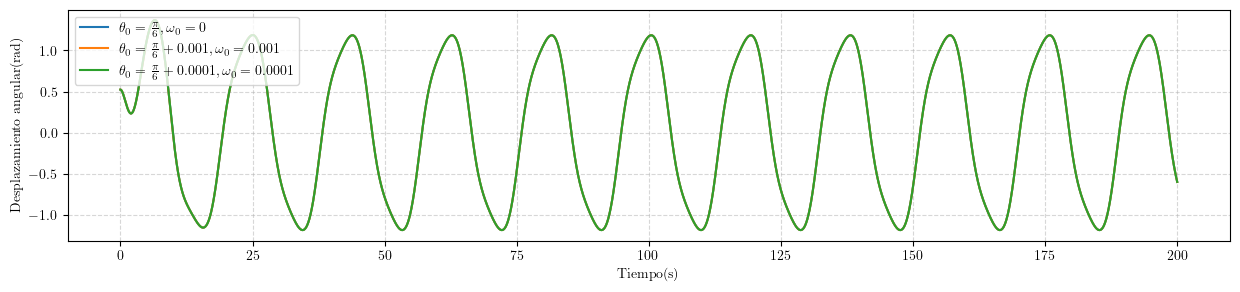

In [246]:
fig,ax=plt.subplots(figsize=(15,3))
#Establece la fuente de texto en formato de latex 
#Para usarlo se debe compilar dos veces la primera vez
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t1,Mod2pi(x11[0]), label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.plot(t1,Mod2pi(x12[0]), label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(t1,Mod2pi(x13[0]), label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.ylabel("Desplazamiento angular(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t0901.pdf")

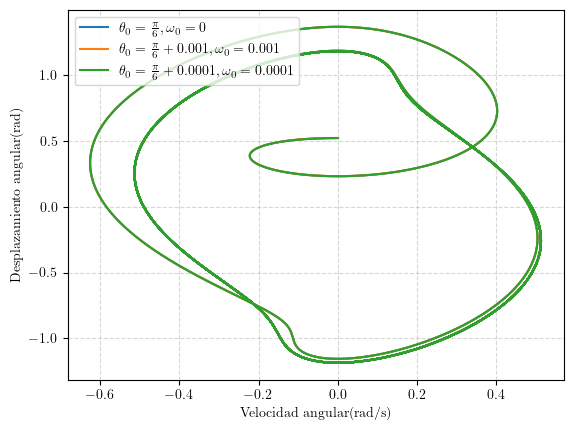

In [247]:
plt.plot(x11[1],x11[0], label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.plot(x12[1],x12[0], label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(x13[1],x13[0], label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.ylabel("Desplazamiento angular(rad)")
plt.xlabel("Velocidad angular(rad/s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t0902.pdf")

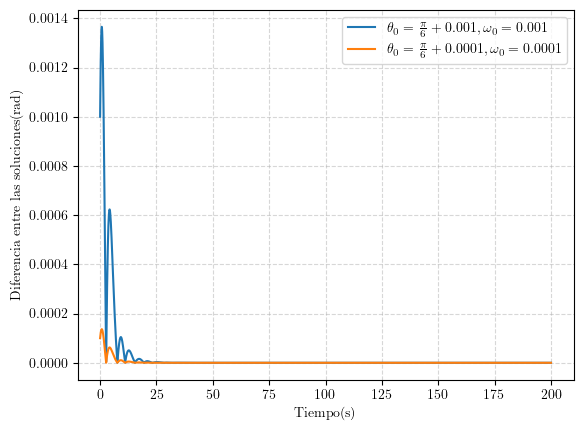

In [248]:
delta_x1=np.abs(x11[0]-x12[0])
delta_x2=np.abs(x11[0]-x13[0])
plt.plot(t1,delta_x1, label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(t1,delta_x2, label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.ylabel("Diferencia entre las soluciones(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend()
plt.savefig("t0903.pdf")

Para los parámetros $\nu=0.5, \tau=1.07, f=\frac{1}{6\pi}$

In [270]:
#Condiciones iniciales
n=100000
h=0.01
t0=0
v0=0
x0=np.pi/6

In [271]:
#Parámetros de la ecuación
nu=0.5 #Inercia
tau=1.07 #Amplitud del torque
f=1/(6*np.pi) #Frecuencia
#Array del tiempo
t=np.zeros(n)
t[0]=t0
#Parámetros originales
x=np.zeros((3,n))
#Parámetros con una ligera desviación
x1=np.zeros((3,n))
x2=np.zeros((3,n))

In [272]:
x21,t2=SystemSolver(x,t,h,n,nu,tau,f,x0,v0)
x22,t2=SystemSolver(x1,t,h,n,nu,tau,f,x0+0.001,v0+0.001)
x23,t2=SystemSolver(x2,t,h,n,nu,tau,f,x0+0.0001,v0+0.0001)


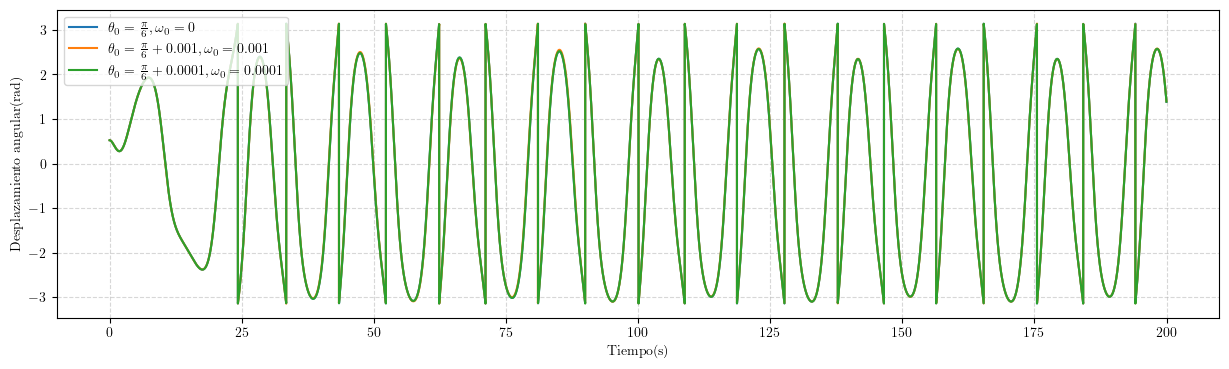

In [276]:
fig,ax=plt.subplots(figsize=(15,4))
#Establece la fuente de texto en formato de latex 
#Para usarlo se debe compilar dos veces la primera vez
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t2[:20000],Mod2pi(x21[0,:20000]), label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.plot(t2[:20000],Mod2pi(x22[0,:20000]), label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(t2[:20000],Mod2pi(x23[0,:20000]), label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.ylabel("Desplazamiento angular(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t1071.pdf")

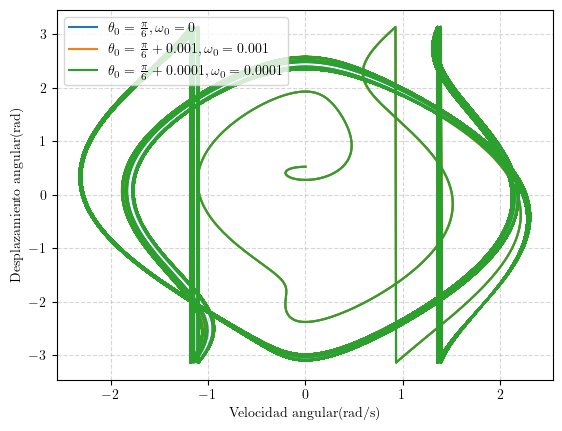

In [278]:
plt.plot(x21[1],Mod2pi(x21[0]), label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.plot(x22[1],Mod2pi(x22[0]), label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(x23[1],Mod2pi(x23[0]), label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.ylabel("Desplazamiento angular(rad)")
plt.xlabel("Velocidad angular(rad/s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t1072.pdf")

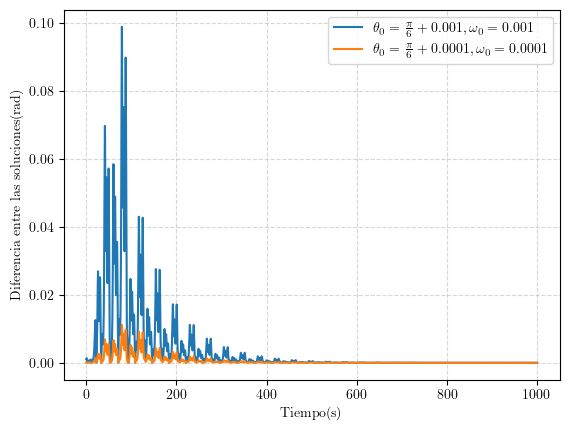

In [277]:
delta_x1=np.abs(x21[0]-x22[0])
delta_x2=np.abs(x21[0]-x23[0])
plt.plot(t2,delta_x1, label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(t2,delta_x2, label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.ylabel("Diferencia entre las soluciones(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend()
plt.savefig("t1073.pdf")

Para los parámetros $\nu=0.5, \tau=1.15, f=\frac{1}{6\pi}$

In [255]:
#Condiciones iniciales
n=20000
h=0.01
t0=0
v0=0
x0=np.pi/6

In [256]:
#Parámetros de la ecuación
nu=0.5 #Inercia
tau=1.15 #Amplitud del torque
f=1/(6*np.pi) #Frecuencia
#Array del tiempo
t=np.zeros(n)
t[0]=t0
#Parámetros originales
x=np.zeros((3,n))
#Parámetros con una ligera desviación
x1=np.zeros((3,n))
x2=np.zeros((3,n))

In [257]:
x31,t3=SystemSolver(x,t,h,n,nu,tau,f,x0,v0)
x32,t3=SystemSolver(x1,t,h,n,nu,tau,f,x0+0.001,v0+0.001)
x33,t3=SystemSolver(x2,t,h,n,nu,tau,f,x0+0.0001,v0+0.0001)

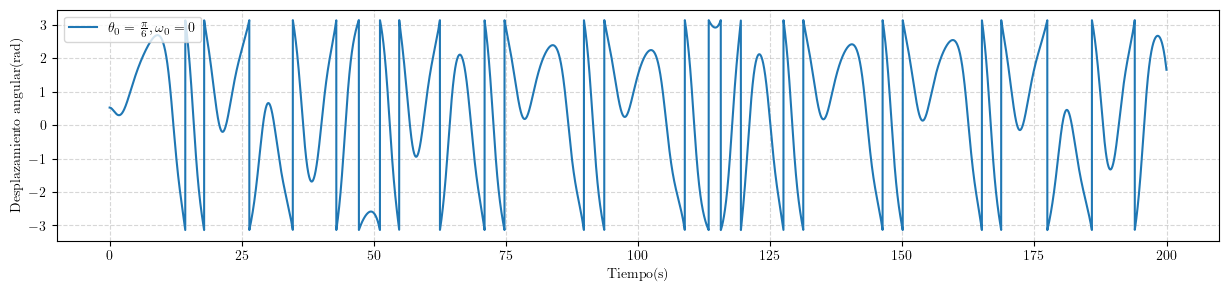

In [258]:
fig,ax=plt.subplots(figsize=(15,3))
#Establece la fuente de texto en formato de latex 
#Para usarlo se debe compilar dos veces la primera vez
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t3,Mod2pi(x31[0]), label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.ylabel("Desplazamiento angular(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t1150.pdf")


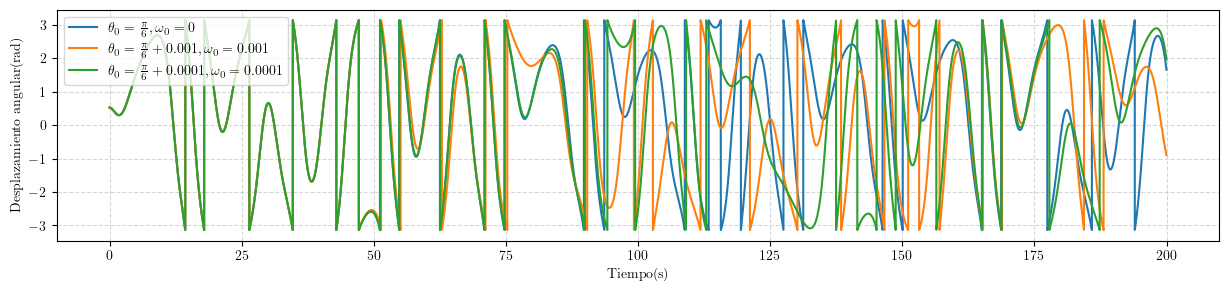

In [259]:
fig,ax=plt.subplots(figsize=(15,3))
#Establece la fuente de texto en formato de latex 
#Para usarlo se debe compilar dos veces la primera vez
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t3,Mod2pi(x31[0]), label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.plot(t3,Mod2pi(x32[0]), label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(t3,Mod2pi(x33[0]), label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.ylabel("Desplazamiento angular(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t1151.pdf")

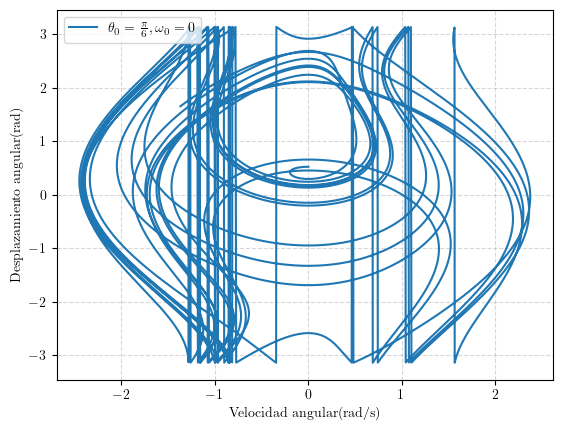

In [260]:
plt.plot(x31[1],Mod2pi(x31[0]), label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.ylabel("Desplazamiento angular(rad)")
plt.xlabel("Velocidad angular(rad/s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t1152.pdf")

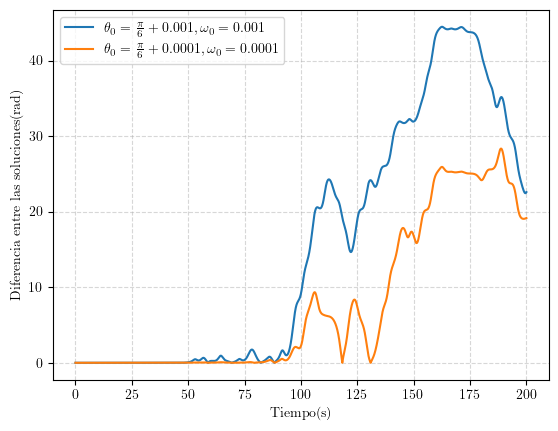

In [261]:
delta_x1=np.abs(x31[0]-x32[0])
delta_x2=np.abs(x31[0]-x33[0])
plt.plot(t3,delta_x1, label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(t3,delta_x2, label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.ylabel("Diferencia entre las soluciones(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend()
plt.savefig("t1153.pdf")

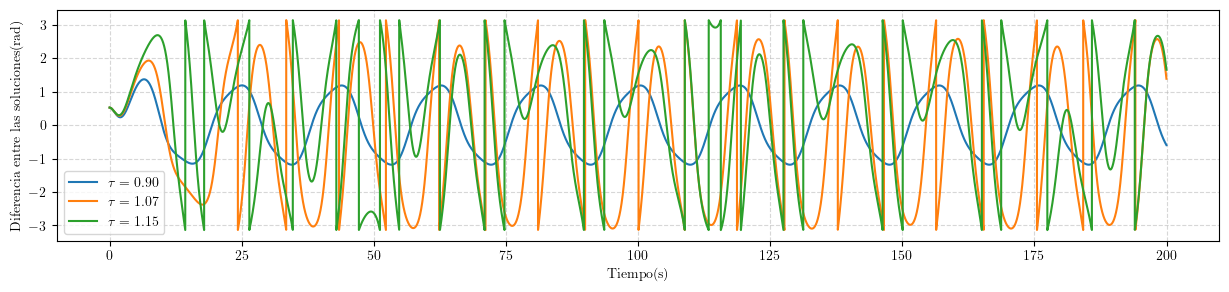

In [262]:
fig,ax=plt.subplots(figsize=(15,3))
plt.plot(t1,Mod2pi(x11[0]), label=r'$\tau=0.90$')
plt.plot(t2,Mod2pi(x21[0]), label=r'$\tau=1.07$')
plt.plot(t3,Mod2pi(x31[0]), label=r'$\tau=1.15$')
plt.ylabel("Diferencia entre las soluciones(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend()
plt.savefig("tall.pdf")

Variaremos los otros parámetros para observar cómo afectan a la solución

Para los parámetros $\nu=2.0, \tau=0.90, f=\frac{1}{6\pi}$

In [263]:
#Condiciones iniciales
n=20000
h=0.01
t0=0
v0=0
x0=np.pi/6

In [264]:
#Parámetros de la ecuación
nu=3.0 #Inercia
tau=0.90 #Amplitud del torque
f=1/(6*np.pi) #Frecuencia
#Array del tiempo
t=np.zeros(n)
t[0]=t0
#Parámetros originales
x=np.zeros((3,n))
#Parámetros con una ligera desviación
x1=np.zeros((3,n))
x2=np.zeros((3,n))

In [265]:
x41,t4=SystemSolver(x,t,h,n,nu,tau,f,x0,v0)
x42,t4=SystemSolver(x1,t,h,n,nu,tau,f,x0+0.001,v0+0.001)
x43,t4=SystemSolver(x2,t,h,n,nu,tau,f,x0+0.0001,v0+0.0001)


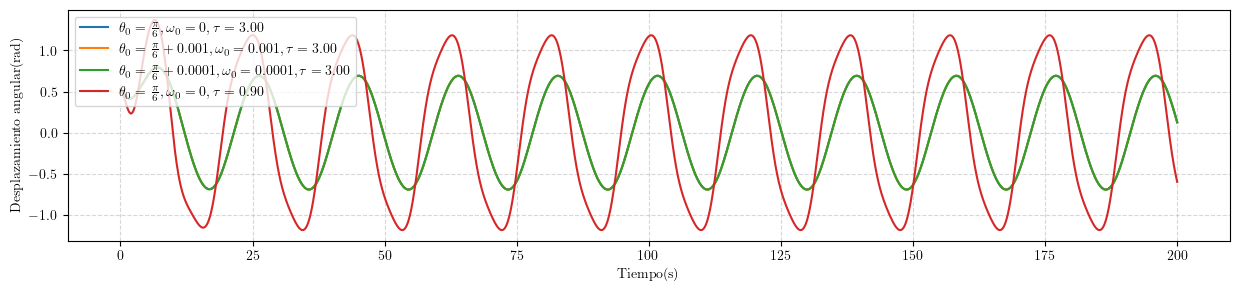

In [266]:
fig,ax=plt.subplots(figsize=(15,3))
#Establece la fuente de texto en formato de latex 
#Para usarlo se debe compilar dos veces la primera vez
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t4,Mod2pi(x41[0]), label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0, \tau=3.00$')
plt.plot(t4,Mod2pi(x42[0]), label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001, \tau=3.00$')
plt.plot(t4,Mod2pi(x43[0]), label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001, \tau=3.00$')
plt.plot(t1,Mod2pi(x11[0]), label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0, \tau=0.90$')
plt.ylabel("Desplazamiento angular(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("v20.pdf")

Para los parámetros $\nu=0.5, \tau=0.90, f=\frac{1}{\pi}$

In [267]:
#Condiciones iniciales
n=20000
h=0.01
t0=0
v0=0
x0=np.pi/6

In [268]:
#Parámetros de la ecuación
nu=0.5 #Inercia
tau=0.90 #Amplitud del torque
f=1/(np.pi) #Frecuencia
#Array del tiempo
t=np.zeros(n)
t[0]=t0
#Parámetros originales
x=np.zeros((3,n))
#Parámetros con una ligera desviación
x1=np.zeros((3,n))
x2=np.zeros((3,n))

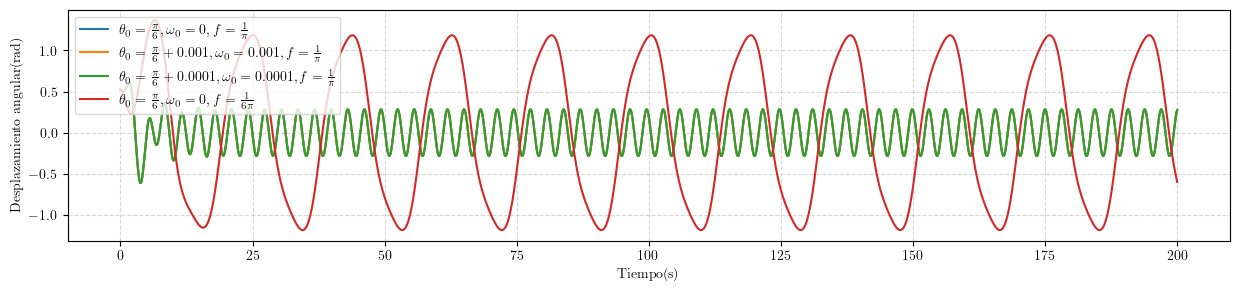

In [269]:
x51,t5=SystemSolver(x,t,h,n,nu,tau,f,x0,v0)
x52,t5=SystemSolver(x1,t,h,n,nu,tau,f,x0+0.001,v0+0.001)
x53,t5=SystemSolver(x2,t,h,n,nu,tau,f,x0+0.0001,v0+0.0001)
fig,ax=plt.subplots(figsize=(15,3))
#Establece la fuente de texto en formato de latex 
#Para usarlo se debe compilar dos veces la primera vez
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t5,Mod2pi(x51[0]), label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0, f=\frac{1}{\pi}$')
plt.plot(t5,Mod2pi(x52[0]), label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001, f=\frac{1}{\pi}$')
plt.plot(t5,Mod2pi(x53[0]), label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001, f=\frac{1}{\pi}$')
plt.plot(t1,Mod2pi(x11[0]), label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0, f=\frac{1}{6\pi}$')
plt.ylabel("Desplazamiento angular(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("f1pi1.pdf")